In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

In [55]:


mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.4]])

mean_02 = np.array([3,4.5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])



In [56]:
dist_01 = np.random.multivariate_normal(mean_01,cov_01,400)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,400)

### visualization

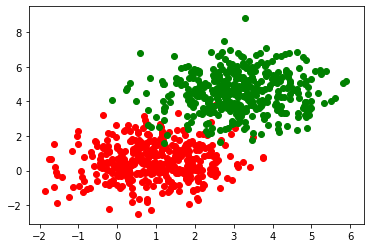

In [57]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green')
plt.show()


In [58]:
total = dist_01.shape[0] + dist_02.shape[0]

In [59]:
total

800

In [60]:
data = np.zeros((total, 3))

In [61]:
data[:400, :-1] = dist_01
data[400:, :-1] = dist_02
data[:400, -1] = 1

In [78]:
np.random.shuffle(data)

In [79]:
print(data)

[[-0.10333165 -0.6001189   1.        ]
 [ 0.30435324 -0.74106562  1.        ]
 [-0.37004854 -0.99377352  1.        ]
 ...
 [ 0.94998261  0.5817355   0.        ]
 [-1.46050324 -1.46452158  1.        ]
 [ 0.04193809 -1.28832786  1.        ]]


### Normalizing Data

In [80]:
u = np.mean(data[:, :-1], axis = 0)
sigma = np.std(data[:, :-1], axis = 0)
data[:, :-1] = (data[:, :-1] - u)/sigma

In [81]:
print(data.shape)

(800, 3)


In [82]:
ones = np.ones((data.shape[0], 1), dtype='float64')

In [83]:
final_data = np.hstack((ones, data))

In [84]:
final_data

array([[ 1.        , -0.10333165, -0.6001189 ,  1.        ],
       [ 1.        ,  0.30435324, -0.74106562,  1.        ],
       [ 1.        , -0.37004854, -0.99377352,  1.        ],
       ...,
       [ 1.        ,  0.94998261,  0.5817355 ,  0.        ],
       [ 1.        , -1.46050324, -1.46452158,  1.        ],
       [ 1.        ,  0.04193809, -1.28832786,  1.        ]])

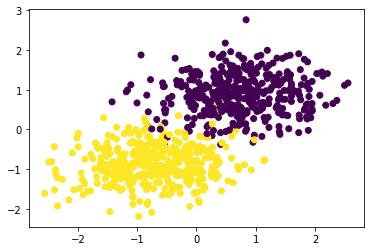

In [108]:
plt.scatter(final_data[:, 1], final_data[:, 2], c = final_data[:, 3] );

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data[:, :-1], final_data[:, -1], test_size = 0.2)

In [88]:
print(X_train.shape, X_test.shape)

(640, 3) (160, 3)


In [89]:
np.std(X_train, axis = 0)

array([0.        , 0.98463946, 0.99557484])

In [90]:
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(640, 3) (160, 3)
(640,) (160,)


In [91]:
np.mean(X_train,axis=0)

array([ 1.        , -0.04259837, -0.03901502])

In [92]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [93]:
sigmoid(np.inf)

1.0

In [138]:
def hypothesis(x,theta):
    return sigmoid(np.dot(theta.T, x))


In [139]:
def error(Y, X, theta):
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        y_hat = hypothesis(X[i], theta)
        total_error += (Y[i]*np.log2(y_hat) + (1 - Y[i])*np.log2(1 - y_hat))
    
    return -total_error/m  # average loss

In [147]:
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        x = X[i].reshape((-1,1))
        grad += (Y[i] - y_hat)*x
        
    return grad/m #Average Gradient

In [148]:

def grad_descent(X,Y,learning_rate=0.5):
    theta = np.zeros((X.shape[1],1))
    
    error_list = []
    
    for i in range(500):
        theta = theta + learning_rate*get_grad(Y,X,theta)
        e = error(Y,X,theta)
        error_list.append(e)
        
    return theta,error_list


        

In [149]:
theta, error_list =  grad_descent(X_train, Y_train)

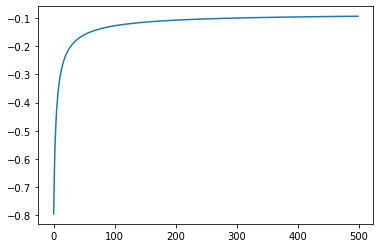

In [150]:
plt.plot(error_list);

In [132]:
theta

array([[-0.25369881],
       [-1.94437714],
       [-5.17223981]])

In [133]:
def predict(xtest,theta):
    prob = hypothesis(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

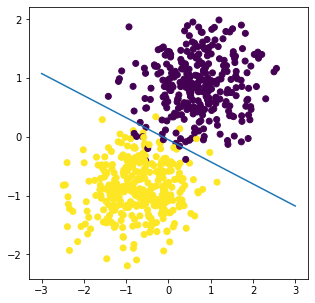

In [134]:
def drawLine():
    plt.figure(figsize=(5,5))
    x = np.linspace(-3,3,10)
    y = -(theta[0,0]*1 + theta[1,0]*x)/theta[2,0]
    plt.scatter(X_train[:,1],X_train[:,2],c=Y_train)
    
    plt.plot(x,y)
    
drawLine()

In [135]:
Y_Pred = np.array([predict(X_test[i],theta) for i in range(X_test.shape[0])])

In [136]:
Y_test = np.array(Y_test,dtype='int32')

In [137]:
print("Test Accuracy")
np.sum((Y_Pred==Y_test))*100/Y_test.shape[0]


Test Accuracy


98.75